<a href="https://colab.research.google.com/github/ErikRidhoFirm/Pembelajaran-Mesin_Ganjil_2025/blob/main/Pembelajaran_Mesin_Praktikum9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pratikum 1**

Langkah 1 - Persiapan Data

Langkah 2 - Import Library

In [ ]:
# import package
import numpy as np
import pandas as pd

Langkah 3 - Baca Data

In [ ]:
# baca data dari file CSV

from google.colab import files
uploaded = files.upload() # upload dataset

data = pd.read_csv('dataset.csv')

Saving dataset.csv to dataset.csv


Langkah 4 - Pemahaman Terhadap Data

In [ ]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Langkah 5 - Visualisasi Data

In [ ]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Import library Matplotlib dan Seaborn untuk visualisasi data.

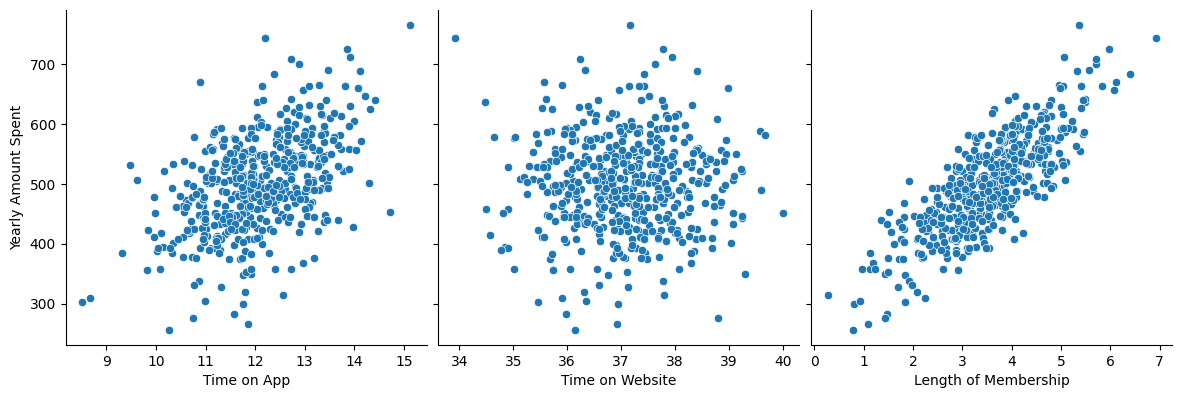

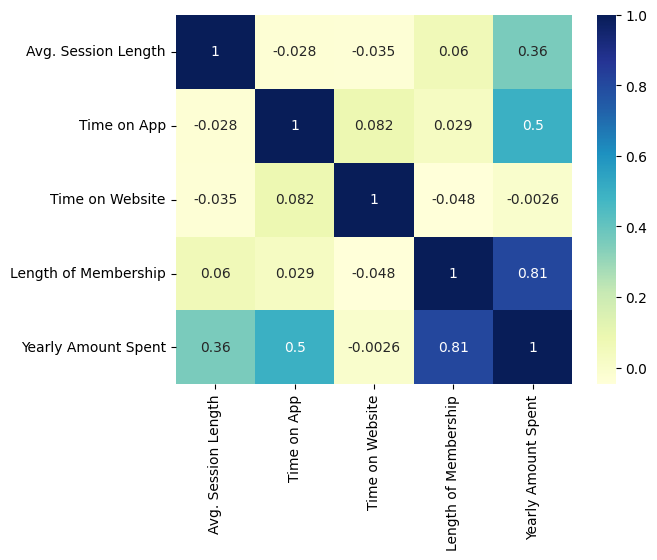

In [ ]:
# import library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# visualisasi data with pairplot - membuat scatter plot matrix untuk melihat hubungan antar variabel
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', height=4, aspect=1, kind='scatter')
plt.show()  # menampilkan plot yang telah dibuat

# visualisasi korelasi with heatmap - menampilkan matriks korelasi dalam bentuk heatmap
numeric_data = data.select_dtypes(include=np.number)  # memilih hanya kolom dengan tipe data numerik
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)  # membuat heatmap dengan color map YlGnBu dan annotasi nilai
plt.show()  # menampilkan heatmap

Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

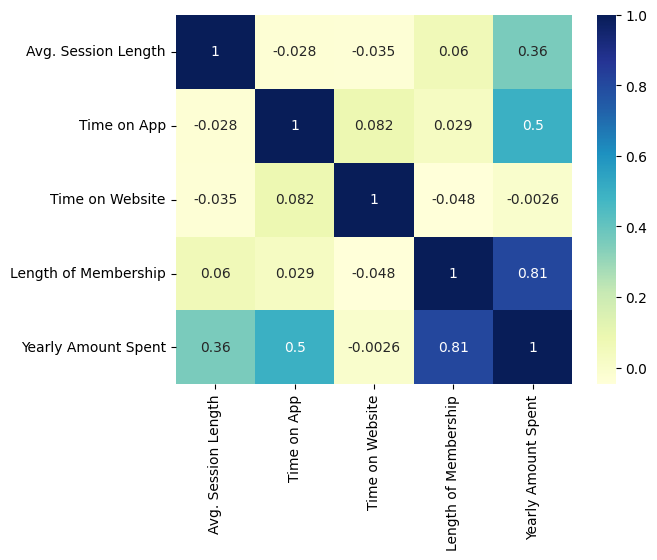

In [ ]:
# visualisasi korelasi with heatmap - menampilkan matriks korelasi dalam bentuk heatmap
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Langkah 6 - Regresi Linier

In [ ]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

Pisahkan variabel bebas (X) dan variabel target (y).

In [ ]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


* Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.

* Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

In [ ]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

Visualisasikan garis regresi pada data latih.

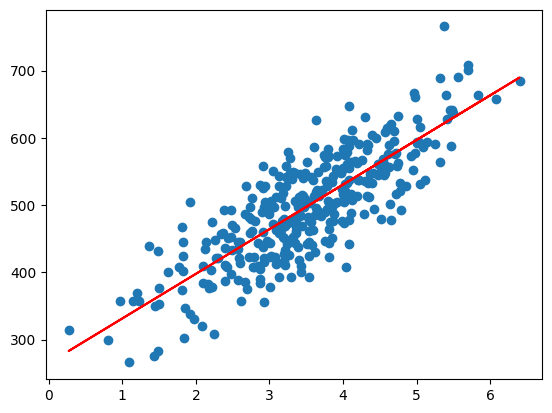

In [ ]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Langkah 7 - Analisis Residual

In [ ]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi).

/tmp/ipython-input-594495671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


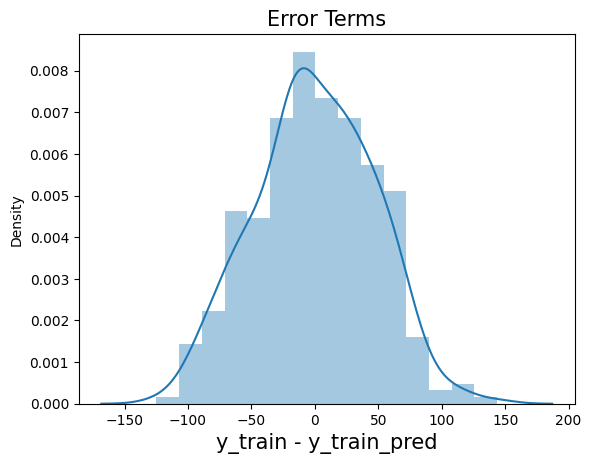

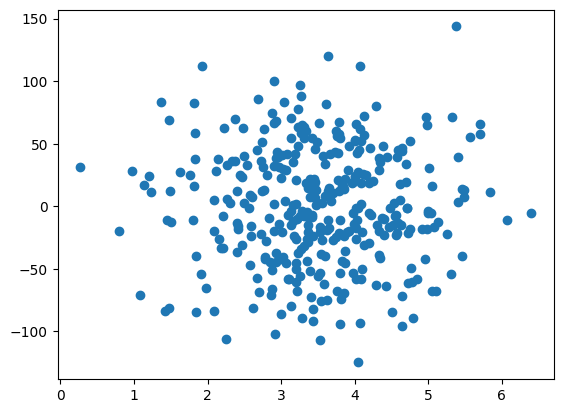

In [ ]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error

Langkah 8 - Prediksi pada data uji dan evaluasi model

In [ ]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

Lakukan prediksi pada data uji.

In [ ]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Hitung nilai R-squared untuk mengukur kinerja model pada data uji

Langkah 9 - Visualisasi Hasil

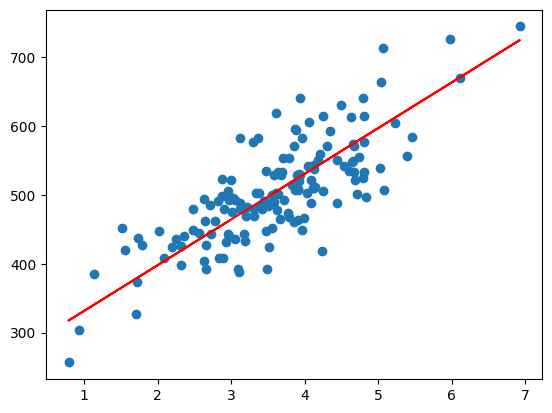

In [ ]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Visualisasikan data uji dan hasil prediksi dalam bentuk scatter plot.

# **Praktikum 2**

1. Mengimpor Library
Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2. Mengimpor Dataset:

* Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.

* Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [ ]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)

from google.colab import files
uploaded = files.upload() # upload dataset

dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

Saving Posisi_gaji.csv to Posisi_gaji.csv


3. Feature Scaling
Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

4. Fitting SVR ke Dataset:
Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [ ]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

5. Visualisasi Hasil SVR
langkah selanjutkan, lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


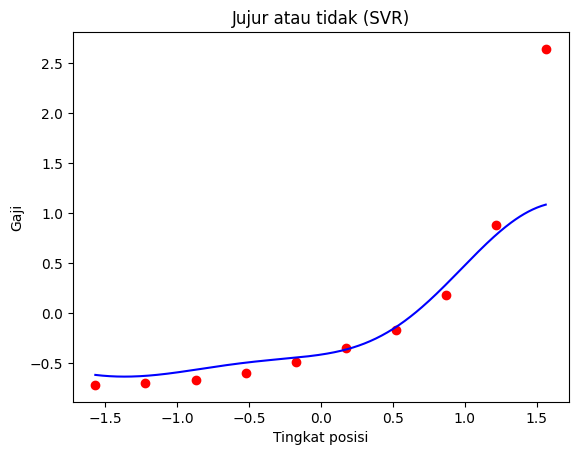

In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

6. Prediksi Hasil:

* Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.

* Menskalakan fitur prediksi menggunakan sc_X.transform.

* Melakukan prediksi menggunakan model SVR yang telah dilatih.

* Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [ ]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

7. Menampilkan Hasil:
Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [ ]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


8. Validasi Hasil

/tmp/ipython-input-2776607475.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


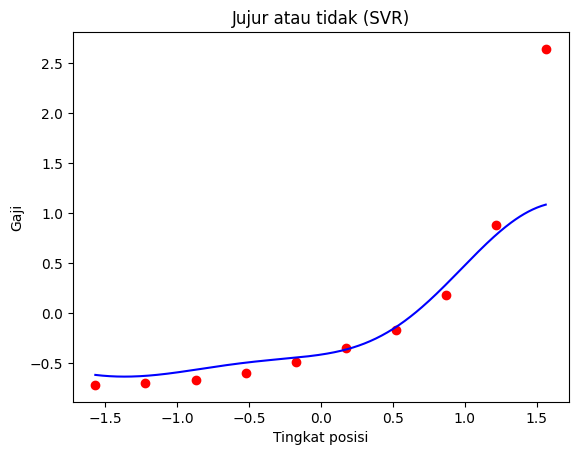

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [ ]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

9. Evaluasi Model SVR
Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [ ]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# **Tugas Praktikum**

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

3. Lakukan feature scaling jika diperlukan.

4. Buat model multiple linear regression menggunakan Scikit-Learn.

5. Latih model pada data latih dan lakukan prediksi pada data uji.

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**

* Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

* Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

* Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

**JAWABAN**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [ ]:
# ======================================================
# TUGAS 1 - ANALISIS REGRESI LINIER BERGANDA
# ======================================================

# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# ======================================================
# 1. BACA DAN DESKRIPSI DATASET
# ======================================================

from google.colab import files
uploaded = files.upload() # upload dataset

# Load dataset
df = pd.read_csv("insurance.csv")

# Tampilkan 5 data pertama
print("=== 5 Data Pertama ===")
print(df.head())

# Deskripsi variabel
print("\n=== Deskripsi Variabel ===")
print("""
1. age        : Usia individu (numerik)
2. sex        : Jenis kelamin (kategori: male/female)
3. bmi        : Body Mass Index, mengukur tingkat kegemukan
4. children   : Jumlah anak yang ditanggung oleh asuransi
5. smoker     : Status perokok (yes/no)
6. region     : Wilayah tempat tinggal (northeast, northwest, southeast, southwest)
7. charges    : Biaya medis personal (variabel target)
""")

# Informasi dasar dataset
print("\n=== Informasi Dataset ===")
print(df.info())

# Statistik deskriptif
print("\n=== Statistik Deskriptif ===")
print(df.describe())

Saving insurance.csv to insurance.csv
=== 5 Data Pertama ===
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

=== Deskripsi Variabel ===

1. age        : Usia individu (numerik)
2. sex        : Jenis kelamin (kategori: male/female)
3. bmi        : Body Mass Index, mengukur tingkat kegemukan
4. children   : Jumlah anak yang ditanggung oleh asuransi
5. smoker     : Status perokok (yes/no)
6. region     : Wilayah tempat tinggal (northeast, northwest, southeast, southwest)
7. charges    : Biaya medis personal (variabel target)


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [ ]:
# ======================================================
# 2. PEMBAGIAN DATA (TRAIN DAN TEST)
# ======================================================

from sklearn.model_selection import train_test_split

# Encode variabel kategori
data = df.copy()
data["sex"] = data["sex"].map({"male": 0, "female": 1})
data["smoker"] = data["smoker"].map({"no": 0, "yes": 1})
data = pd.get_dummies(data, columns=["region"], drop_first=True)

# Tentukan fitur dan target
X = data.drop(columns=["charges"])
y = data["charges"]

# Bagi menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data latih :", X_train.shape[0])
print("Jumlah data uji   :", X_test.shape[0])


Jumlah data latih : 1070
Jumlah data uji   : 268


3. Lakukan feature scaling jika diperlukan.

In [ ]:
# ======================================================
# 3. FEATURE SCALING (opsional untuk regresi linier)
# ======================================================

# Untuk regresi linier biasa, scaling tidak wajib.
# Tapi kita tunjukkan contohnya agar lengkap.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling selesai. Data sudah terstandarisasi (mean=0, std=1).")


Feature scaling selesai. Data sudah terstandarisasi (mean=0, std=1).


4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [ ]:
# ======================================================
# 4. Multiple Linear Regression
# ======================================================
print("\n" + "="*50)  # membuat garis pemisah
print("MULTIPLE LINEAR REGRESSION")  # header section
print("="*50)  # membuat garis pemisah

print("No 4: Buat model multiple linear regression menggunakan Scikit-Learn.")
linear_model = LinearRegression()  # membuat objek model regresi linear


print("No 5: Latih model pada data latih dan lakukan prediksi pada data uji.")
linear_model.fit(X_train_scaled, y_train)  # melatih model dengan data training yang sudah di-scale

y_pred_linear = linear_model.predict(X_test_scaled)  # melakukan prediksi pada data testing

print("No 6: Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.")
r2_linear = r2_score(y_test, y_pred_linear)  # menghitung R-squared (koefisien determinasi)
mse_linear = mean_squared_error(y_test, y_pred_linear)  # menghitung Mean Squared Error
mae_linear = mean_absolute_error(y_test, y_pred_linear)  # menghitung Mean Absolute Error

print("Evaluasi Multiple Linear Regression:")  # header hasil evaluasi
print(f"R-squared : {r2_linear:.4f}")  # menampilkan R-squared dengan 4 digit desimal
print(f"MSE       : {mse_linear:.2f}")  # menampilkan MSE dengan 2 digit desimal
print(f"MAE       : {mae_linear:.2f}")  # menampilkan MAE dengan 2 digit desimal


MULTIPLE LINEAR REGRESSION
No 4: Buat model multiple linear regression menggunakan Scikit-Learn.
No 5: Latih model pada data latih dan lakukan prediksi pada data uji.
No 6: Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.
Evaluasi Multiple Linear Regression:
R-squared : 0.7836
MSE       : 33596915.85
MAE       : 4181.19


Visualisasi Data & Hasil Regresi

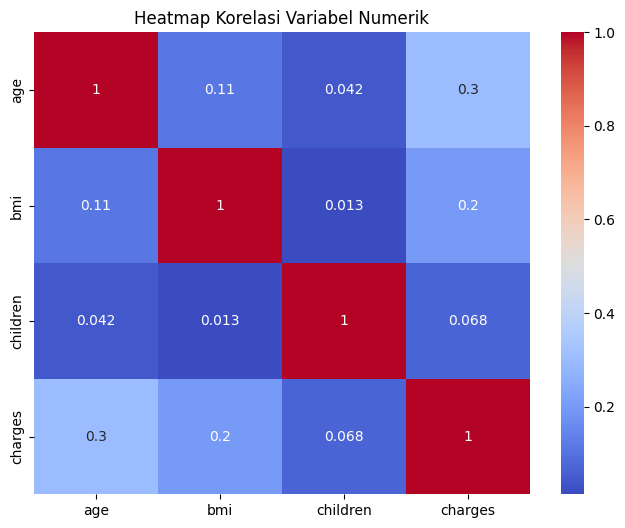

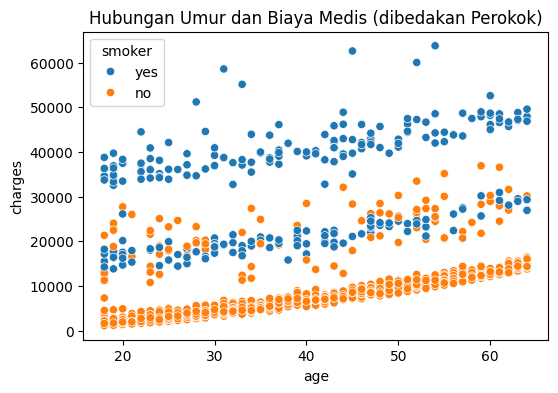

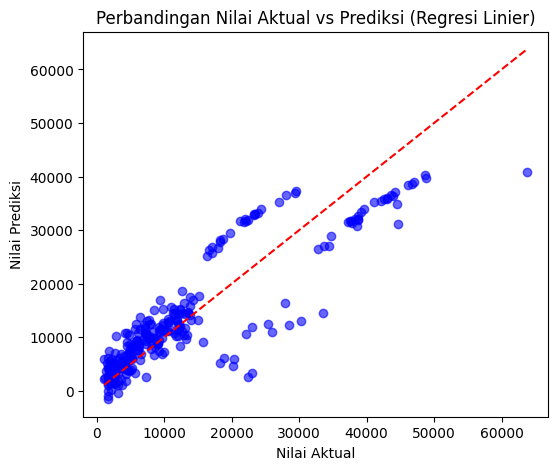

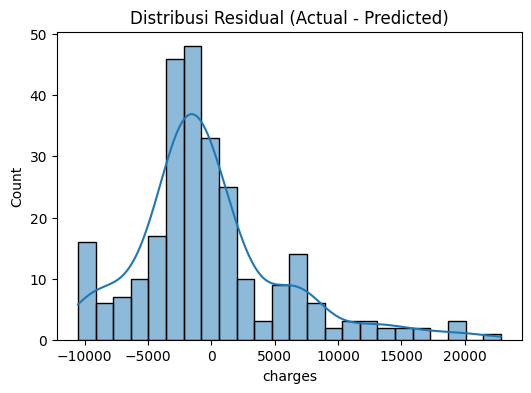

In [ ]:
# ======================================================
# 6. VISUALISASI DATA & HASIL REGRESI
# ======================================================

import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap korelasi variabel numerik
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

# Scatter plot hubungan umur & biaya, dibedakan perokok/tidak
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("Hubungan Umur dan Biaya Medis (dibedakan Perokok)")
plt.show()

# Perbandingan nilai actual vs prediksi
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_linear, color="blue", alpha=0.6) # Changed y_pred to y_pred_linear
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Perbandingan Nilai Aktual vs Prediksi (Regresi Linier)")
plt.show()

# Distribusi residual
residuals = y_test - y_pred_linear # Changed y_pred to y_pred_linear
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residual (Actual - Predicted)")
plt.show()

**Kesimpulan dan Analisis Hasil**

Dari tugas diatas dapat disimpulkan bahwa Model regresi linier berganda mampu memprediksi biaya medis dengan cukup baik. Nilai R2 yang mendekati 0.8 menandakan bahwa model ini dapat menjelaskan sebagian besar variasi data.
Namun terdapat pula indikasi bahwa hubungan antara beberapa variabel (terutama perokok dan biaya medis) tidak sepenuhnya linier, sehingga metode lain seperti Support Vector Regression (SVR) atau Random Forest Regression dapat memberikan hasil yang lebih akurat